## Task-1

### Importing Libraries

In [65]:
import os
import pandas as pd
import numpy as np
from os import walk
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from keras.layers.core import  Activation, Dropout
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Predicting Gender using RandomForest Classifier

### Data Loading

In [2]:
data=pd.read_csv('G:/Spotdraft/blac_fem/Black-Female-Names.csv')
data['name']= data[[' first name', 'last name']].apply(lambda x: ' '.join(x), axis=1)
data.drop('last name',axis=1,inplace=True)
data.drop(' first name',axis=1,inplace=True)


In [3]:
data1=pd.read_csv('G:/Spotdraft/blac_mal/Black-Male-Names.csv')
data1['name']= data1[['first name', 'last name']].apply(lambda x: ' '.join(x), axis=1)
data1.drop('last name',axis=1,inplace=True)
data1.drop('first name',axis=1,inplace=True)

In [4]:
data2=pd.read_csv('G:/Spotdraft/his_fem/Hispanic-Female-Names.csv')
data2['name']= data2[[' first name', 'last name']].apply(lambda x: ' '.join(x), axis=1)
data2.drop('last name',axis=1,inplace=True)
data2.drop(' first name',axis=1,inplace=True)


In [5]:
data3=pd.read_csv('G:/Spotdraft/his_mal/Hispanic-Male-Names.csv')
data3['name']= data3[['first name', 'last name']].apply(lambda x: ' '.join(x), axis=1)
data3.drop('last name',axis=1,inplace=True)
data3.drop('first name',axis=1,inplace=True)


In [6]:
data4=pd.read_csv('G:/Spotdraft/whi_fem/White-Female-Names.csv')
data4['name']= data4[[' first name', 'last name']].apply(lambda x: ''.join(x), axis=1)
data4.drop('last name',axis=1,inplace=True)
data4.drop(' first name',axis=1,inplace=True)

In [7]:
data5=pd.read_csv('G:/Spotdraft/whi_mal/White-Male-Names.csv')
data5['name']= data5[[' first name', 'last name']].apply(lambda x: ''.join(x), axis=1)
data5.drop('last name',axis=1,inplace=True)
data5.drop(' first name',axis=1,inplace=True)

In [39]:
data6=pd.read_csv('G:/Spotdraft/ind_mal/Indian-Male-Names.csv')

In [9]:
data6 = data6[['gender', 'race', 'name']]

In [10]:
data7=pd.read_csv('G:/Spotdraft/ind_fem/Indian-Female-Names.csv')
data7 = data7[['gender', 'race', 'name']]

In [ ]:
new_data = data.append([data1, data2, data3, data4,data5,data6,data7])

In [265]:
new_data.shape

(120721, 3)

In [266]:
new_data.head()

,gender,name,race
0,f,manisha,indian
1,m,paul dschuman,white
2,m,saruf,indian
3,f,kanchan,indian
4,m,ruben berrios,white


### Data Preprocessing

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120777 entries, 0 to 15381
Data columns (total 3 columns):
gender    120777 non-null object
name      120722 non-null object
race      120777 non-null object
dtypes: object(3)
memory usage: 6.2+ MB


In [25]:
new_data.dropna(inplace=True)

In [29]:
new_data = new_data.sample(frac=1).reset_index(drop=True) #shuffling the data

In [33]:
new_data.race.value_counts()

white       48648
black       37518
indian      30172
hispanic     4383
Name: race, dtype: int64

In [32]:
new_data=new_data[new_data.race!='b']

In [34]:
new_data.gender.value_counts()

m    98115
f    22606
Name: gender, dtype: int64

In [270]:
# Data Duplication removal
final=new_data.drop_duplicates(subset={"name","race","gender"}, keep='first', inplace=False)
final.shape

(104192, 3)

In [141]:
final_copy=final.copy()

In [172]:
def namePreprocess(x):
    return re.sub('[^A-Za-z0-9]+', ' ', x) and re.sub("\S*\d\S*", "", x).strip()

In [173]:
final['name'].map(namePreprocess)
final.head()

,gender,name,race,last_letter,second_last_character,n_letter,n_words,Gender Value
0,f,manisha,0,1,8,7,1,1
1,m,paul dschuman,1,14,1,14,3,0
2,m,saruf,0,6,21,5,1,0
3,f,kanchan,0,14,1,7,1,1
4,m,ruben berrios,1,19,15,15,4,0


### Feature Engineering the data

In [144]:
def lastCharacter(x):
    return ord(x[-1])-ord('a')+1
def secondlastCharacter(x):
    return ord(x[-2])-ord('a')+1
def countletters(x):
    return len(x)
def countwords(x):
    return len(x.split(' '))

In [145]:
final["last_letter"] = final['name'].map(lastCharacter)
final["second_last_character"] = final['name'].map(secondlastCharacter)
final["n_letter"]=final['name'].map(countletters)
final['n_words']=final['name'].map(countwords)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [146]:
final.head()

,gender,name,race,last_letter,second_last_character,n_letter,n_words
0,f,manisha,indian,1,8,7,1
1,m,paul dschuman,white,14,1,14,3
2,m,saruf,indian,6,21,5,1
3,f,kanchan,indian,14,1,7,1
4,m,ruben berrios,white,19,15,15,4


In [147]:
def checkGender(gender):
    if gender == "m":
        return 0
    return 1
    
final["Gender Value"] = final["gender"].map(checkGender)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
X=final[['last_letter','second_last_character','n_letter','n_words']]
y=final['Gender Value']

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

In [66]:
# Building a RandomForest classifier model
clf = RandomForestClassifier(n_estimators=150, min_samples_split=20)
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
# accuracy on training data
predictions = clf.predict(Xtrain)
accuracy_score(ytrain, predictions)

0.90038391015356412

In [67]:
# accuracy on test data
predictions = clf.predict(Xtest)
accuracy_score(ytest, predictions)

0.8924208934388087

In [157]:
def predict_gender(x):
    d=dict()
    d['last_letter']=ord(x[-1])-ord('a')+1
    d['second_last_character']=ord(x[-2])-ord('a')+1
    d['n_letter']=len(x)
    d['n_words']=len(x.split(' '))
    return pd.Series(d).reshape(1,-1)

In [113]:
x=predict_gender('Narendra Modi')
#print(pd.Series(x))
clas=clf.predict(x)
dist=clf.predict_proba(x)
x1=dist[0]
m=x1[0]
f=x1[1]
maximum=max(m,f)*100

print(clas[0],'-',round(maximum),'%' )

0 - 76.0 %


C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


## Predicting Gender using (LSTM)

In [219]:
X=final['name']
Y=final['Gender Value']

In [276]:
# Converting full data into imdb format
data = []
for name in X:
    
    row = []
    for char in name:
        
            row.append(ord(char))
    data.append(row)

In [221]:
data[0]

[109, 97, 110, 105, 115, 104, 97]

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [223]:
print(X_train[2])
print(type(X_train[1]))
print(len(X_train[2]))

[32, 108, 97, 114, 114, 121, 32, 32, 103, 114, 101, 103, 111, 114, 121]
<class 'list'>
15


In [224]:
max_length = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

print(X_train.shape)

print(X_train[1])

(72934, 30)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 112 101 100
 114 111  32 106  32  32 110 105 101 118 101 115]


In [233]:
X_train=X_train.reshape((72934,30,1))
X_test=X_test.reshape((31258,30,1))
Y_train=Y_train.reshape((72934,1))
Y_test=Y_test.reshape((31258,1))                        

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [237]:
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(30,1)))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 30, 64)            16896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 50,053
Trainable params: 50,053
Non-trainable params: 0
_________________________________________________________________
None


In [238]:
hist=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=1000)

Train on 72934 samples, validate on 31258 samples
Epoch 1/10
72934/72934 [==============================] - 461s 6ms/step - loss: 0.4118 - acc: 0.8454 - val_loss: 0.3576 - val_acc: 0.8676
Epoch 2/10
72934/72934 [==============================] - 143s 2ms/step - loss: 0.3541 - acc: 0.8642 - val_loss: 0.3417 - val_acc: 0.8679
Epoch 3/10
72934/72934 [==============================] - 127s 2ms/step - loss: 0.3462 - acc: 0.8645 - val_loss: 0.3412 - val_acc: 0.8681
Epoch 4/10
72934/72934 [==============================] - 123s 2ms/step - loss: 0.3450 - acc: 0.8650 - val_loss: 0.3407 - val_acc: 0.8677
Epoch 5/10
72934/72934 [==============================] - 124s 2ms/step - loss: 0.3437 - acc: 0.8659 - val_loss: 0.3400 - val_acc: 0.8673
Epoch 6/10
72934/72934 [==============================] - 124s 2ms/step - loss: 0.3432 - acc: 0.8654 - val_loss: 0.3393 - val_acc: 0.8674
Epoch 7/10
72934/72934 [==============================] - 124s 2ms/step - loss: 0.3427 - acc: 0.8651 - val_loss: 0.3382 - 

In [239]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.96%


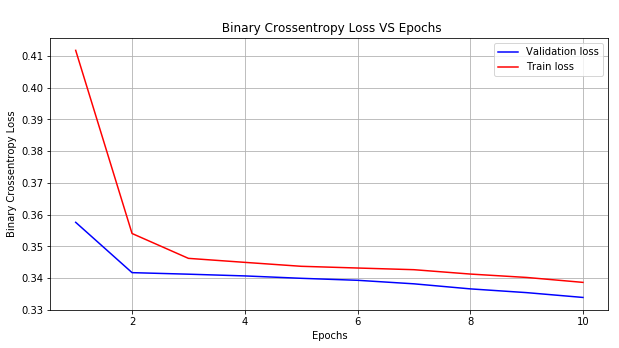

In [240]:
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation loss")
  plt.plot(x, ty, 'r', label="Train loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\n Binary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()


x = list(range(1,11))

# Validation loss
vy = hist.history['val_loss']
# Training loss
ty = hist.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## Predict race from a name using (LSTM)

In [267]:
def convertRace(x):
    if x=='indian':
        return 0
    elif x=='white':
        return 1
    elif x=='black':
        return 2
    elif x=='hispanic':
        return 3

In [272]:
final['race']=final['race'].map(convertRace)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [273]:
final.head()

,gender,name,race
0,f,manisha,0
1,m,paul dschuman,1
2,m,saruf,0
3,f,kanchan,0
4,m,ruben berrios,1


In [274]:
final.race.value_counts()

1    48097
2    36487
0    15292
3     4316
Name: race, dtype: int64

In [321]:
X=final['name']
Y=final['race']

In [313]:
from keras.utils import np_utils
Y = np_utils.to_categorical(Y)

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [323]:
print(X_train[2])
print(type(X_train[1]))
print(len(X_train[2]))

[32, 108, 97, 114, 114, 121, 32, 32, 103, 114, 101, 103, 111, 114, 121]
<class 'list'>
15


In [325]:
max_length = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

print(X_train.shape)

print(X_train[1])

(72934, 30)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 112 101 100
 114 111  32 106  32  32 110 105 101 118 101 115]


In [326]:
X_train=X_train.reshape((72934,30,1))
X_test=X_test.reshape((31258,30,1))
Y_train=Y_train.reshape((72934,1))
Y_test=Y_test.reshape((31258,1))    

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [329]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(30,1)))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 30, 128)           66560     
_________________________________________________________________
dropout_23 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 258       
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 12        
Total params: 198,414
Trainable params: 198,414
Non-trainable params: 0
_________________________________________________________________
None

In [330]:
hist1=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=1000)

Train on 72934 samples, validate on 31258 samples
Epoch 1/10
72934/72934 [==============================] - 327s 4ms/step - loss: 0.5312 - acc: 0.8303 - val_loss: 0.1925 - val_acc: 0.9504
Epoch 2/10
72934/72934 [==============================] - 343s 5ms/step - loss: 0.3848 - acc: 0.9016 - val_loss: 0.1913 - val_acc: 0.9519
Epoch 3/10
72934/72934 [==============================] - 386s 5ms/step - loss: 0.1999 - acc: 0.9502 - val_loss: 0.1827 - val_acc: 0.9514
Epoch 4/10
72934/72934 [==============================] - 388s 5ms/step - loss: 0.1898 - acc: 0.9517 - val_loss: 0.1757 - val_acc: 0.9533
Epoch 5/10
72934/72934 [==============================] - 387s 5ms/step - loss: 0.1871 - acc: 0.9522 - val_loss: 0.1750 - val_acc: 0.9532
Epoch 6/10
72934/72934 [==============================] - 338s 5ms/step - loss: 0.1833 - acc: 0.9527 - val_loss: 0.1763 - val_acc: 0.9528
Epoch 7/10
72934/72934 [==============================] - 287s 4ms/step - loss: 0.1827 - acc: 0.9528 - val_loss: 0.1716 - 

In [331]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.53%


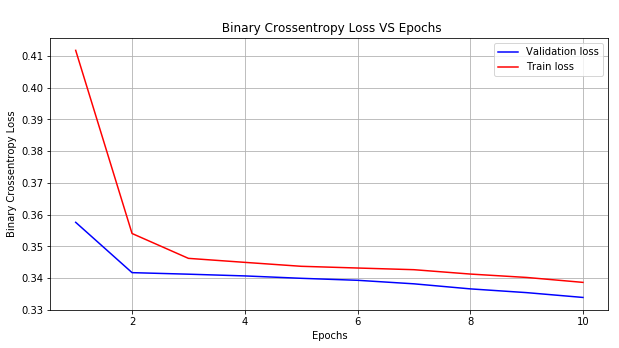

In [332]:
x = list(range(1,11))

# Validation loss
vy = hist.history['val_loss']
# Training loss
ty = hist.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [339]:
name="Narendra Modi"
X=[]
X1=[]
for char in name:
    X.append(ord(char))
for k in range(max_length-len(X)):
    X1.append(0)
X=X1+X    
X=np.array(X)

In [342]:
X=X.reshape((1,30,1))

In [343]:
pred=model.predict(np.asarray(X))

In [349]:
pred

array([[  9.99529004e-01,   2.92504206e-04,   1.19638827e-07,
          1.78424190e-04]], dtype=float32)

In [345]:
model.predict_classes(np.asarray(X))

array([0], dtype=int64)